In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

file_path = 'drive/MyDrive/DATASETS/finaldf.csv'
df = pd.read_csv(file_path)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              45312 non-null  int64  
 1   id                 45312 non-null  int64  
 2   title              45312 non-null  object 
 3   genres             45148 non-null  object 
 4   original_language  45312 non-null  object 
 5   popularity         45312 non-null  float64
 6   release_date       45311 non-null  object 
 7   budget             45312 non-null  float64
 8   revenue            45312 non-null  float64
 9   runtime            45304 non-null  float64
 10  status             45312 non-null  object 
 11  vote_average       45312 non-null  float64
 12  vote_count         45312 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 4.5+ MB


In [51]:
# prompt: crie uma copia segura desse dataset df

df_copy = df.copy()


In [52]:
df_copy.head()

,index,id,title,genres,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,0,615656,Meg 2: The Trench,Action Science Fiction Horror,en,8763.998,2023-08-02,129000000.0,3.520565e+08,116.0,Released,7.079,1365.0
1,1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,5953.227,2023-04-05,18000000.0,6.567582e+07,103.0,Released,7.433,545.0
2,2,533535,Deadpool & Wolverine,Action Comedy Science Fiction,en,5410.496,2024-07-24,200000000.0,1.326387e+09,128.0,Released,7.765,3749.0
3,3,667538,Transformers: Rise of the Beasts,Action Adventure Science Fiction,en,5409.104,2023-06-06,200000000.0,4.070455e+08,127.0,Released,7.340,1007.0
4,4,693134,Dune: Part Two,Science Fiction Adventure,en,4742.163,2024-02-27,190000000.0,6.838137e+08,167.0,Released,8.300,2770.0


In [53]:
# Substituir valores zero por 1 nas colunas 'budget' e 'revenue'
df_copy['budget'] = df_copy['budget'].replace(0, 1)
df_copy['revenue'] = df_copy['revenue'].replace(0, 1)

# Aplicar a transformação logarítmica
df_copy['budget_log'] = np.log(df_copy['budget'])
df_copy['revenue_log'] = np.log(df_copy['revenue'])

In [54]:
df_copy.head()

,index,id,title,genres,original_language,popularity,release_date,budget,revenue,runtime,status,vote_average,vote_count,budget_log,revenue_log
0,0,615656,Meg 2: The Trench,Action Science Fiction Horror,en,8763.998,2023-08-02,129000000.0,3.520565e+08,116.0,Released,7.079,1365.0,18.675323,19.679302
1,1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,5953.227,2023-04-05,18000000.0,6.567582e+07,103.0,Released,7.433,545.0,16.705882,18.000241
2,2,533535,Deadpool & Wolverine,Action Comedy Science Fiction,en,5410.496,2024-07-24,200000000.0,1.326387e+09,128.0,Released,7.765,3749.0,19.113828,21.005725
3,3,667538,Transformers: Rise of the Beasts,Action Adventure Science Fiction,en,5409.104,2023-06-06,200000000.0,4.070455e+08,127.0,Released,7.340,1007.0,19.113828,19.824435
4,4,693134,Dune: Part Two,Science Fiction Adventure,en,4742.163,2024-02-27,190000000.0,6.838137e+08,167.0,Released,8.300,2770.0,19.062535,20.343196


In [55]:
df_copy = df_copy.drop(['budget', 'revenue'], axis=1)

In [20]:
df_copy.head()

,index,id,title,genres,original_language,popularity,release_date,runtime,status,vote_average,vote_count,budget_log,revenue_log
0,0,615656,Meg 2: The Trench,Action Science Fiction Horror,en,8763.998,2023-08-02,116.0,Released,7.079,1365.0,18.675323,19.679302
1,1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,5953.227,2023-04-05,103.0,Released,7.433,545.0,16.705882,18.000241
2,2,533535,Deadpool & Wolverine,Action Comedy Science Fiction,en,5410.496,2024-07-24,128.0,Released,7.765,3749.0,19.113828,21.005725
3,3,667538,Transformers: Rise of the Beasts,Action Adventure Science Fiction,en,5409.104,2023-06-06,127.0,Released,7.340,1007.0,19.113828,19.824435
4,4,693134,Dune: Part Two,Science Fiction Adventure,en,4742.163,2024-02-27,167.0,Released,8.300,2770.0,19.062535,20.343196


<Axes: >

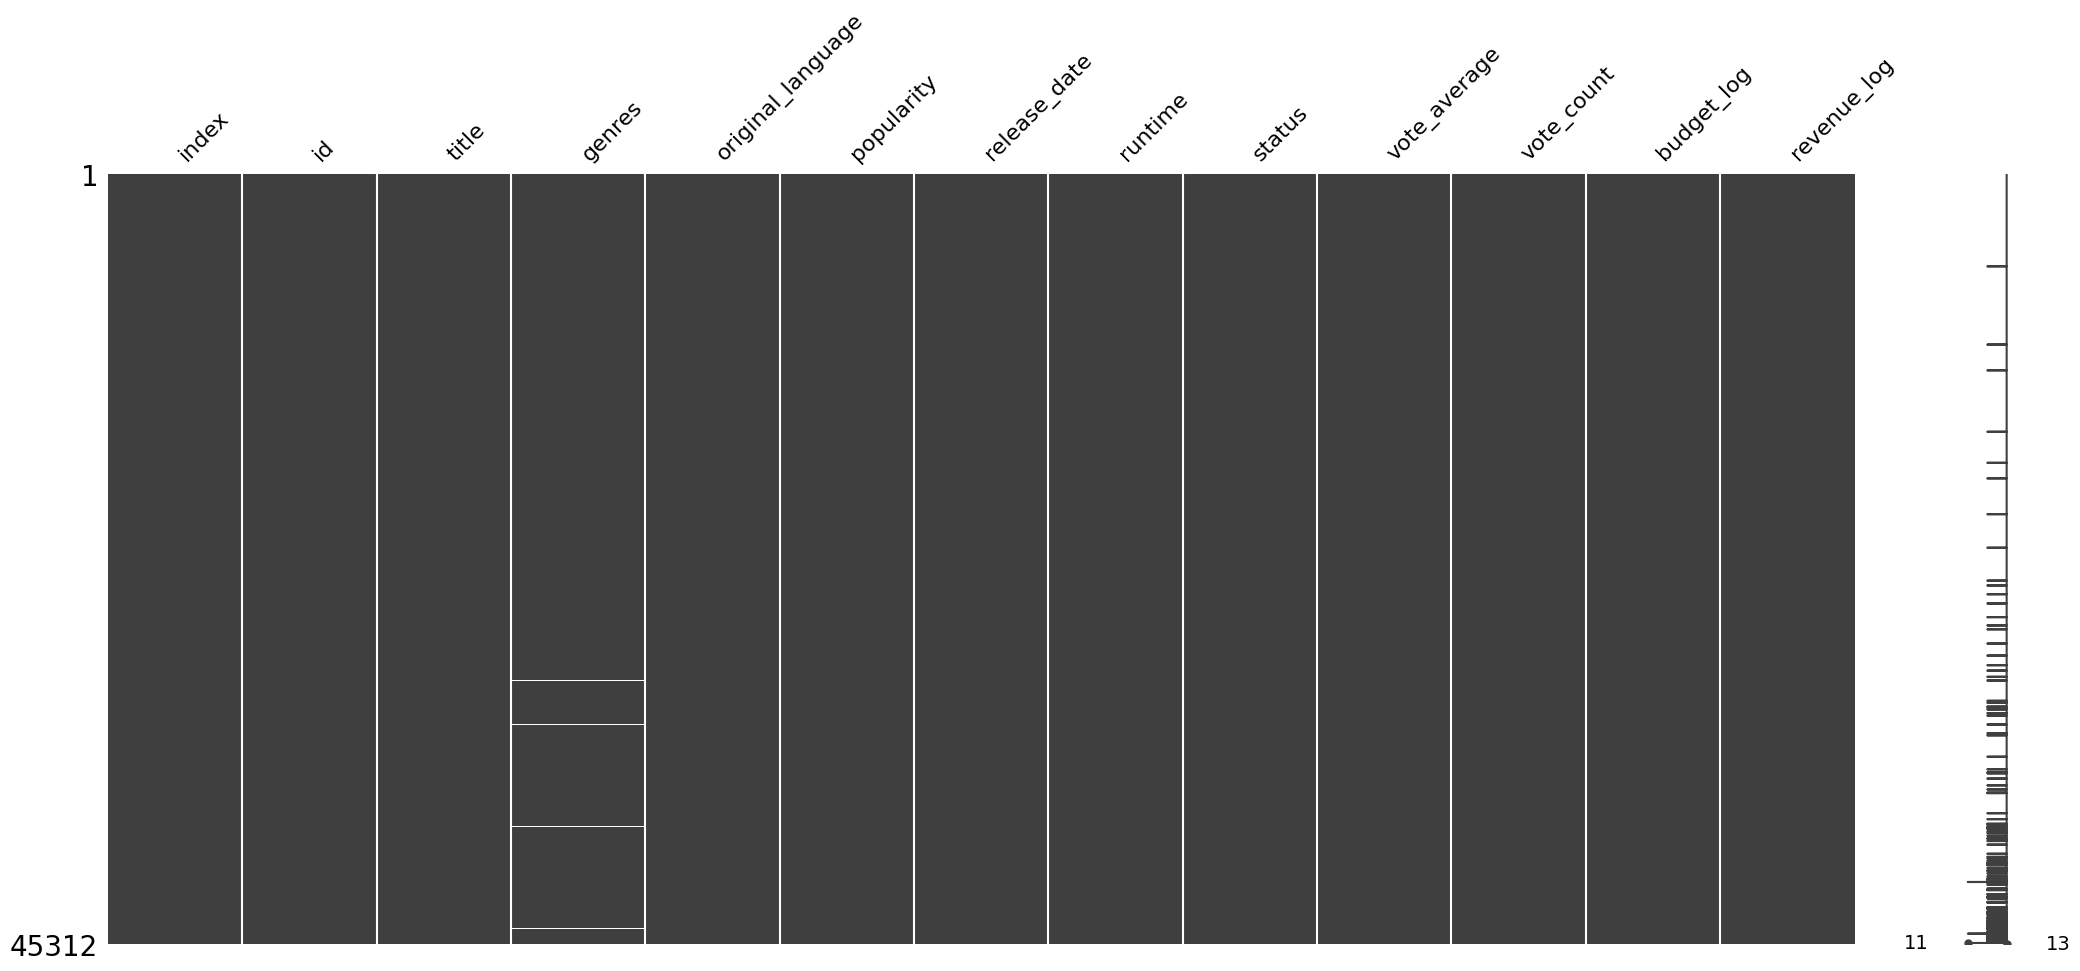

In [56]:
msno.matrix(df_copy)

In [57]:
# Assumindo que a coluna de data se chama 'release_date'
# Verifique o tipo de dado da coluna
print(df_copy['release_date'].dtype)

# Se o tipo não for 'datetime64[ns]', converta:
df_copy['release_date'] = pd.to_datetime(df_copy['release_date'], errors='coerce')
# 'errors='coerce'' transformará quaisquer datas inválidas em NaT (Not a Time),
# o que é útil para lidar com valores ausentes ou formatos incorretos.

object


In [58]:
# prompt: vamos gerar duas colunas derivadas de release_date , a relase year e  release month com numeros inteiros e remover a release_year

# Extrair o ano e o mês para novas colunas
df_copy['release_year'] = df_copy['release_date'].dt.year
df_copy['release_month'] = df_copy['release_date'].dt.month

# Converter as novas colunas para inteiros (se não forem nulas)
df_copy['release_year'] = df_copy['release_year'].astype('Int64') # Usar 'Int64' para permitir NaNs
df_copy['release_month'] = df_copy['release_month'].astype('Int64') # Usar 'Int64' para permitir NaNs

# Remover a coluna 'release_date' original
df_copy = df_copy.drop('release_date', axis=1)

df_copy.head()

,index,id,title,genres,original_language,popularity,runtime,status,vote_average,vote_count,budget_log,revenue_log,release_year,release_month
0,0,615656,Meg 2: The Trench,Action Science Fiction Horror,en,8763.998,116.0,Released,7.079,1365.0,18.675323,19.679302,2023,8
1,1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,5953.227,103.0,Released,7.433,545.0,16.705882,18.000241,2023,4
2,2,533535,Deadpool & Wolverine,Action Comedy Science Fiction,en,5410.496,128.0,Released,7.765,3749.0,19.113828,21.005725,2024,7
3,3,667538,Transformers: Rise of the Beasts,Action Adventure Science Fiction,en,5409.104,127.0,Released,7.340,1007.0,19.113828,19.824435,2023,6
4,4,693134,Dune: Part Two,Science Fiction Adventure,en,4742.163,167.0,Released,8.300,2770.0,19.062535,20.343196,2024,2


In [59]:
# prompt: quantos com o status não lançado existem ?

# Conta quantos filmes têm o status 'Não lançado'
nao_lancados_count = df_copy[df_copy['status'] == 'Não lançado'].shape[0]

print(f"Número de filmes com status 'Não lançado': {nao_lancados_count}")

Número de filmes com status 'Não lançado': 0


In [60]:
df_copy = df_copy.drop('status', axis=1)

In [61]:
df_copy.head()

,index,id,title,genres,original_language,popularity,runtime,vote_average,vote_count,budget_log,revenue_log,release_year,release_month
0,0,615656,Meg 2: The Trench,Action Science Fiction Horror,en,8763.998,116.0,7.079,1365.0,18.675323,19.679302,2023,8
1,1,758323,The Pope's Exorcist,Horror Mystery Thriller,en,5953.227,103.0,7.433,545.0,16.705882,18.000241,2023,4
2,2,533535,Deadpool & Wolverine,Action Comedy Science Fiction,en,5410.496,128.0,7.765,3749.0,19.113828,21.005725,2024,7
3,3,667538,Transformers: Rise of the Beasts,Action Adventure Science Fiction,en,5409.104,127.0,7.340,1007.0,19.113828,19.824435,2023,6
4,4,693134,Dune: Part Two,Science Fiction Adventure,en,4742.163,167.0,8.300,2770.0,19.062535,20.343196,2024,2


In [70]:
# prompt: vamos tirar a casa decimal de vote count

median_runtime = df_copy['runtime'].median()
df_copy['runtime'] = df_copy['runtime'].fillna(median_runtime)

df_copy['runtime'] = df_copy['runtime'].astype(int)
df_copy['vote_count'] = df_copy['vote_count'].astype(int)

In [71]:
df_copy.head(1)

,index,id,title,genres,original_language,popularity,runtime,vote_average,vote_count,budget_log,revenue_log,release_year,release_month
0,0,615656,Meg 2: The Trench,Action Science Fiction Horror,en,8763.998,116,7.079,1365,18.675323,19.679302,2023,8


In [66]:
testDf = df_copy.copy()

df_generes = testDf['genres'].str.get_dummies(sep=' ')
testDf = pd.concat([testDf, df_generes], axis=1)


testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              45312 non-null  int64  
 1   id                 45312 non-null  int64  
 2   title              45312 non-null  object 
 3   genres             45148 non-null  object 
 4   original_language  45312 non-null  object 
 5   popularity         45312 non-null  float64
 6   runtime            45312 non-null  int64  
 7   vote_average       45312 non-null  float64
 8   vote_count         45312 non-null  float64
 9   budget_log         45312 non-null  float64
 10  revenue_log        45312 non-null  float64
 11  release_year       45311 non-null  Int64  
 12  release_month      45311 non-null  Int64  
 13  Action             45312 non-null  int64  
 14  Adventure          45312 non-null  int64  
 15  Animation          45312 non-null  int64  
 16  Comedy             453

In [72]:
# prompt: quanto idiomas diferentes o testDF tem ?

num_idiomas = testDf['original_language'].nunique()
print(f"O testDF tem {num_idiomas} idiomas diferentes na coluna 'original_language'.")

O testDF tem 86 idiomas diferentes na coluna 'original_language'.


In [73]:
# prompt: vamos pegar cada um desses 86 idiomas

print("vamos pegar cada um desses 86 idiomas")

# Exibir os idiomas únicos
print("Idiomas presentes na coluna 'original_language':")
print(testDf['original_language'].unique())

vamos pegar cada um desses 86 idiomas
Idiomas presentes na coluna 'original_language':
['en' 'ko' 'es' 'no' 'cn' 'hi' 'fi' 'ru' 'ja' 'uk' 'nl' 'it' 'th' 'id'
 'is' 'da' 'fr' 'pl' 'zh' 'te' 'pt' 'de' 'ro' 'sr' 'sv' 'gl' 'tr' 'tl'
 'ar' 'cs' 'el' 'ga' 'mk' 'fa' 'ml' 'kn' 'ca' 'ta' 'sh' 'km' 'he' 'hu'
 'eu' 'dz' 'xx' 'la' 'vi' 'bn' 'ms' 'bs' 'bo' 'lv' 'sk' 'et' 'hy' 'sq'
 'kk' 'ka' 'ku' 'ur' 'sw' 'af' 'mi' 'mn' 'se' 'sl' 'cy' 'lt' 'ps' 'mr'
 'wo' 'bm' 'pa' 'ay' 'hr' 'bg' 'am' 'lo' 'iu' 'qu' 'zu' 'xh' 'yi' 'eo'
 'ne' 'nb']


In [74]:
# prompt: tem br ou pt br nesse original language?

# Verificar se 'br' ou 'pt-br' está presente nos idiomas únicos
idiomas_unicos = testDf['original_language'].unique()
tem_br = 'br' in idiomas_unicos
tem_pt_br = 'pt-br' in idiomas_unicos

print(f"A lista de idiomas únicos contém 'br': {tem_br}")
print(f"A lista de idiomas únicos contém 'pt-br': {tem_pt_br}")

# Se você quiser saber qual está presente (se houver)
if tem_br:
  print("'br' está presente na lista de idiomas.")
elif tem_pt_br:
  print("'pt-br' está presente na lista de idiomas.")
else:
  print("Nem 'br' nem 'pt-br' estão presentes na lista de idiomas.")

A lista de idiomas únicos contém 'br': False
A lista de idiomas únicos contém 'pt-br': False
Nem 'br' nem 'pt-br' estão presentes na lista de idiomas.


In [75]:
idioma_para_continente = {
    # América do Norte
    'en': 'America_do_Norte',

    # Ásia
    'ko': 'Asia',
    'cn': 'Asia', # Chinês (Simplificado/Mandarin)
    'hi': 'Asia', # Hindi
    'ja': 'Asia', # Japonês
    'zh': 'Asia', # Chinês (Genérico/Variedades)
    'te': 'Asia', # Telugu
    'ar': 'Asia', # Árabe (Também África)
    'ml': 'Asia', # Malayalam
    'kn': 'Asia', # Kannada
    'ta': 'Asia', # Tamil
    'km': 'Asia', # Khmer
    'he': 'Asia', # Hebraico
    'bn': 'Asia', # Bengali
    'ms': 'Asia', # Malaio
    'bo': 'Asia', # Tibetano
    'kk': 'Asia', # Cazaque (Também Europa)
    'ka': 'Asia', # Georgiano (Também Europa)
    'ku': 'Asia', # Curdo (Também Europa)
    'ur': 'Asia', # Urdu
    'ps': 'Asia', # Pashto
    'mr': 'Asia', # Marathi
    'lo': 'Asia', # Laosiano
    'ne': 'Asia', # Nepalês


    # Europa
    'es': 'Europa', # Espanhol (Também Américas)
    'no': 'Europa', # Norueguês
    'fi': 'Europa', # Finlandês
    'ru': 'Europa', # Russo (Também Ásia)
    'uk': 'Europa', # Ucraniano
    'nl': 'Europa', # Holandês
    'it': 'Europa', # Italiano
    'fr': 'Europa', # Francês (Também Américas, África)
    'pl': 'Europa', # Polonês
    'pt': 'Europa', # Português (Também Américas, África)
    'de': 'Europa', # Alemão
    'ro': 'Europa', # Romeno
    'sr': 'Europa', # Sérvio
    'sv': 'Europa', # Sueco
    'gl': 'Europa', # Galego
    'tr': 'Europa', # Turco (Também Ásia)
    'cs': 'Europa', # Tcheco
    'el': 'Europa', # Grego
    'ga': 'Europa', # Irlandês
    'mk': 'Europa', # Macedônio
    'sh': 'Europa', # Sérvio-Croata
    'hu': 'Europa', # Húngaro
    'eu': 'Europa', # Basco
    'lv': 'Europa', # Letão
    'sk': 'Europa', # Eslovaco
    'et': 'Europa', # Estoniano
    'hy': 'Europa', # Armênio (Também Ásia)
    'sq': 'Europa', # Albanês
    'se': 'Europa', # Sami Setentrional
    'sl': 'Europa', # Esloveno
    'cy': 'Europa', # Galês
    'lt': 'Europa', # Lituano
    'hr': 'Europa', # Croata
    'bg': 'Europa', # Búlgaro
    'yi': 'Europa', # Iídiche
    'eo': 'Europa', # Esperanto
    'nb': 'Europa', # Bokmål Norueguês


    # África
    'sw': 'Africa', # Suaíli
    'af': 'Africa', # Africâner
    'am': 'Africa', # Amárico
    'zu': 'Africa', # Zulu
    'xh': 'Africa', # Xhosa
    'wo': 'Africa', # Uolofe
    'bm': 'Africa', # Bambara


    # América do Sul
    'qu': 'America_do_Sul', # Quechua
    'ay': 'America_do_Sul', # Aimará


    # Oceania
    'mi': 'Oceania', # Maori


    # Outros / Desconhecido / Códigos Especiais
    'id': 'Asia',   # Indonésio (Geralmente Ásia, mas para simplificar, pode agrupar)
    'is': 'Europa',   # Islandês (Europa, mas pode ser um grupo separado se for muito raro)
    'tl': 'Asia',   # Tagalo (Filipino) (Ásia, mas pode agrupar)
    'dz': 'Asia',   # Dzongkha (Ásia, Butão)
    'xx': 'Outros',   # Sem linguagem / Linguagem desconhecida (Código especial)
    'la': 'Outros',   # Latim (Histórico)
    'vi': 'Asia',   # Vietnamita (Ásia, mas pode agrupar)
    'bs': 'Europa',   # Bósnio (Europa, mas pode agrupar)
    'iu': 'America_do_Norte',   # Inuktitut (América do Norte, Ártico)
    'pa': 'Asia',   # Punjabi (Ásia, mas pode agrupar)
    'th': 'Asia', # Tailandês (Ásia, mas para manter consistência com Ásia acima)

    # Adicionar os idiomas restantes que não foram listados explicitamente acima
    # ...
}



In [76]:
# prompt: arrume isso "testDf['continent'] = testDf['original_language'].map(idioma_para_continente)
# testDf['continent'] = testDf['continent'].fillna('Outros')
# testDf_continentes_encoded = pd.get_dummies(testDf['continent'], prefix='continent')
# testDf = pd.concat([testDf, testDf_continentes_encoded], axis=1)"

import pandas as pd
testDf['continent'] = testDf['original_language'].map(idioma_para_continente)
testDf['continent'] = testDf['continent'].fillna('Outros') # Preenche NaNs antes de codificar
testDf_continentes_encoded = pd.get_dummies(testDf['continent'], prefix='continent')
testDf = pd.concat([testDf, testDf_continentes_encoded], axis=1)
# Opcional: remover a coluna original 'continent' se não for mais necessária
# testDf = testDf.drop('continent', axis=1)

testDf.head() # Verifique se as novas colunas foram adicionadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       45312 non-null  int64  
 1   id                          45312 non-null  int64  
 2   title                       45312 non-null  object 
 3   genres                      45148 non-null  object 
 4   original_language           45312 non-null  object 
 5   popularity                  45312 non-null  float64
 6   runtime                     45312 non-null  int64  
 7   vote_average                45312 non-null  float64
 8   vote_count                  45312 non-null  float64
 9   budget_log                  45312 non-null  float64
 10  revenue_log                 45312 non-null  float64
 11  release_year                45311 non-null  Int64  
 12  release_month               45311 non-null  Int64  
 13  Action                      453

In [77]:
if 'original_language' in testDf.columns:
    testDf = testDf.drop('original_language', axis=1)
if 'continent' in testDf.columns:
    testDf = testDf.drop('continent', axis=1)

In [78]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       45312 non-null  int64  
 1   id                          45312 non-null  int64  
 2   title                       45312 non-null  object 
 3   genres                      45148 non-null  object 
 4   popularity                  45312 non-null  float64
 5   runtime                     45312 non-null  int64  
 6   vote_average                45312 non-null  float64
 7   vote_count                  45312 non-null  float64
 8   budget_log                  45312 non-null  float64
 9   revenue_log                 45312 non-null  float64
 10  release_year                45311 non-null  Int64  
 11  release_month               45311 non-null  Int64  
 12  Action                      45312 non-null  int64  
 13  Adventure                   453

In [79]:
finalDf = testDf.copy()

In [80]:
# prompt: quantos continent_Outros existem em testDf?

# Conta a frequência do valor 'Outros' na coluna 'continent_Outros'
count_continent_outros = finalDf['continent_Outros'].sum()

print(f"Existem {count_continent_outros} entradas com 'continent_Outros' em finalDf.")

Existem 377 entradas com 'continent_Outros' em finalDf.


In [81]:
from typing_extensions import final
# prompt: vamos usar o StandardScaler para padronizar os valores

from sklearn.preprocessing import StandardScaler

# Selecionar as colunas numéricas para padronizar
# Excluindo colunas que já são binárias (dummy) ou que não precisam de padronização
colunas_numericas = [
    'popularity',
    'vote_count',
    'vote_average',
    'runtime',
    'release_year',
    'release_month',
    'budget_log',
    'revenue_log'
]

# Criar o objeto StandardScaler
scaler = StandardScaler()

# Aplicar a padronização às colunas selecionadas
finalDf[colunas_numericas] = scaler.fit_transform(finalDf[colunas_numericas])

# Exibir as primeiras linhas para verificar o resultado
finalDf.describe()

,index,id,popularity,runtime,vote_average,vote_count,budget_log,revenue_log,release_year,release_month,...,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western
count,45312.000000,45312.000000,4.531200e+04,4.531200e+04,4.531200e+04,4.531200e+04,4.531200e+04,4.531200e+04,4.531100e+04,4.531100e+04,...,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,34509.059322,204518.704295,-1.505387e-17,-1.706105e-16,8.969598e-16,5.017957e-18,2.007183e-17,-7.025140e-17,3.773587e-15,-6.899843e-17,...,0.139102,0.049126,0.036591,0.067532,0.158148,0.079184,0.049126,0.191163,0.029749,0.017324
std,30770.444595,235631.078463,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,0.346057,0.216134,0.187757,0.250943,0.364884,0.270029,0.216134,0.393222,0.169897,0.130478
min,0.000000,2.000000,-1.491004e-01,-2.907742e+00,-5.386433e+00,-2.687213e-01,-5.927172e-01,-5.826810e-01,-5.295859e+00,-1.643437e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13630.750000,27134.750000,-1.113616e-01,-2.628047e-01,-6.334076e-01,-2.608668e-01,-5.927172e-01,-5.826810e-01,-4.186174e-01,-7.921076e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27738.500000,73936.500000,-8.368419e-02,1.080949e-02,1.059519e-01,-2.412307e-01,-5.927172e-01,-5.826810e-01,3.871877e-01,5.922159e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46554.500000,365727.500000,-3.178101e-02,4.060300e-01,7.058894e-01,-1.548317e-01,1.115766e+00,8.861050e-01,7.264741e-01,9.105507e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,722089.000000,968051.000000,9.496812e+01,2.627777e+01,3.908373e+00,2.253342e+01,2.266617e+00,2.493637e+00,1.065760e+00,1.478104e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
finalDf.head()

,index,id,title,genres,popularity,runtime,vote_average,vote_count,budget_log,revenue_log,...,Thriller,War,Western,continent_Africa,continent_America_do_Norte,continent_America_do_Sul,continent_Asia,continent_Europa,continent_Oceania,continent_Outros
0,0,615656,Meg 2: The Trench,Action Science Fiction Horror,94.968117,0.618841,0.823131,0.611632,2.084362,2.195014,...,0,0,0,False,True,False,False,False,False,False
1,1,758323,The Pope's Exorcist,Horror Mystery Thriller,64.460388,0.223621,1.197035,0.074911,1.802046,1.958018,...,1,0,0,False,True,False,False,False,False,False
2,2,533535,Deadpool & Wolverine,Action Comedy Science Fiction,58.569659,0.983660,1.547703,2.172051,2.147221,2.382236,...,0,0,0,False,True,False,False,False,False,False
3,3,667538,Transformers: Rise of the Beasts,Action Adventure Science Fiction,58.554550,0.953258,1.098806,0.377308,2.147221,2.215499,...,0,0,0,False,True,False,False,False,False,False
4,4,693134,Dune: Part Two,Science Fiction Adventure,51.315663,2.169321,2.112785,1.531258,2.139868,2.288722,...,0,0,0,False,True,False,False,False,False,False


In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd # Importar pandas se ainda não estiver importado

# Assumindo que 'finalDf' e 'colunas_numericas' já estão definidos
# Exemplo (substitua pelos seus objetos reais):
# finalDf = pd.DataFrame(...)
# colunas_numericas = ['popularity', 'vote_count', 'vote_average', 'runtime',
#                      'release_year', 'release_month', 'budget_log', 'revenue_log']


colunas_presentes = finalDf.columns.tolist()
print("Colunas presentes no finalDf:", colunas_presentes)

colunas_continente = [col for col in colunas_presentes if col.startswith('continent_')]

# Lista de colunas para excluir explicitamente
colunas_para_excluir = ['id', 'title', 'genres', 'original_title', 'tagline', 'overview', 'status']

# Construir a lista de features
# Começamos com todas as colunas presentes...
features_candidatas = colunas_presentes

# ... e removemos as colunas que queremos excluir explicitamente
features_candidatas = [col for col in features_candidatas if col not in colunas_para_excluir]

# Agora, a lista 'features' será simplesmente 'features_candidatas'
# O problema anterior de duplicação não ocorrerá mais com esta abordagem,
# pois não estamos concatenando listas que podem ter sobreposição.
features = features_candidatas

print("Features selecionadas para clustering:", features)


Colunas presentes no finalDf: ['index', 'id', 'title', 'genres', 'popularity', 'runtime', 'vote_average', 'vote_count', 'budget_log', 'revenue_log', 'release_year', 'release_month', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western', 'continent_Africa', 'continent_America_do_Norte', 'continent_America_do_Sul', 'continent_Asia', 'continent_Europa', 'continent_Oceania', 'continent_Outros']
Features selecionadas para clustering: ['index', 'popularity', 'runtime', 'vote_average', 'vote_count', 'budget_log', 'revenue_log', 'release_year', 'release_month', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western', 'continent_Africa', 'continent_America_do_Norte', 'contin

In [83]:
# prompt: existem colunas repetidas ?

duplicados = finalDf.columns[finalDf.columns.duplicated()]

if len(duplicados) > 0:
  print("Existem colunas duplicadas:")
  print(duplicados)
else:
  print("Não existem colunas duplicadas.")

Não existem colunas duplicadas.


In [112]:
# Crie um sub-DataFrame apenas com as features selecionadas
X = finalDf[features].copy()

# Lidar com valores ausentes restantes se houverem
# Alguns algoritmos de clusterização não lidam com NaNs.
# Uma opção é preencher com a média, mediana ou zero, dependendo do contexto.
# X = X.fillna(X.mean()) # Exemplo: Preencher com a média
# Ou remover linhas com NaNs nas features de clustering
X = X.fillna(X.mean())

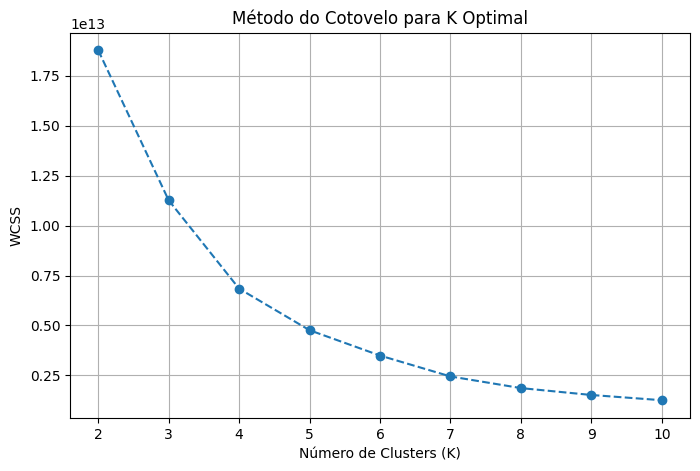

In [113]:
# Método do Cotovelo para encontrar o número ideal de clusters (K)
wcss = []
range_n_clusters = range(2, 11) # Experimente diferentes valores de K (de 1 a 10, por exemplo)

# Iterar através de diferentes valores de K
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init para garantir robustez
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ é o WCSS

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para K Optimal')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [114]:
# Escolha o número ideal de clusters com base no gráfico do cotovelo
# Substitua 'k_otimal' pelo valor que você determinou
k_otimal = 6 # Exemplo: Se o cotovelo estiver em K=4

# Inicializar o modelo K-Means
kmeans_final = KMeans(n_clusters=k_otimal, random_state=42, n_init=10)

# Ajustar o modelo aos dados
kmeans_final.fit(X)

# Obter os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeans_final.labels_

# Adicionar os rótulos dos clusters de volta ao DataFrame original (opcional, mas útil)
# Certifique-se de que os índices de X e do DataFrame original correspondem após o dropna
# Se você removeu NaNs de X, os índices podem ter mudado.
# Uma maneira de garantir a correspondência é adicionar os rótulos a X e depois juntar com o original.
X['cluster'] = cluster_labels

# Se você precisa juntar com o DataFrame original (finalDf), use o índice
# finalDf = finalDf.join(X['cluster'], how='left') # Exemplo de como juntar
# Cuidado com o join se os índices não corresponderem perfeitamente após o dropna

In [115]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X.drop(columns=['cluster']), X['cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.560


In [116]:
X.groupby('cluster')[['Action', 'Drama', 'Comedy', 'Horror']].sum()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       45312 non-null  int64  
 1   popularity                  45312 non-null  float64
 2   runtime                     45312 non-null  float64
 3   vote_average                45312 non-null  float64
 4   vote_count                  45312 non-null  float64
 5   budget_log                  45312 non-null  float64
 6   revenue_log                 45312 non-null  float64
 7   release_year                45312 non-null  float64
 8   release_month               45312 non-null  float64
 9   Action                      45312 non-null  int64  
 10  Adventure                   45312 non-null  int64  
 11  Animation                   45312 non-null  int64  
 12  Comedy                      45312 non-null  int64  
 13  Crime                       453

In [122]:
finalDfcomCluster = pd.concat([testDf, X['cluster']], axis=1)
finalDfcomCluster["cluster"] = X["cluster"].values

In [127]:
finalDfcomCluster.head(3)

,index,id,title,genres,popularity,runtime,vote_average,vote_count,budget_log,revenue_log,...,War,Western,continent_Africa,continent_America_do_Norte,continent_America_do_Sul,continent_Asia,continent_Europa,continent_Oceania,continent_Outros,cluster
0,0,615656,Meg 2: The Trench,Action Science Fiction Horror,8763.998,116,7.079,1365.0,18.675323,19.679302,...,0,0,False,True,False,False,False,False,False,0
1,1,758323,The Pope's Exorcist,Horror Mystery Thriller,5953.227,103,7.433,545.0,16.705882,18.000241,...,0,0,False,True,False,False,False,False,False,0
2,2,533535,Deadpool & Wolverine,Action Comedy Science Fiction,5410.496,128,7.765,3749.0,19.113828,21.005725,...,0,0,False,True,False,False,False,False,False,0


In [123]:
finalDfcomCluster.groupby('cluster')[[
    'popularity', 'vote_count', 'vote_average',
    'budget_log', 'revenue_log', 'release_year', 'runtime'
]].mean().round(2)

,popularity,vote_count,vote_average,budget_log,revenue_log,release_year,runtime
cluster,,,,,,,
0,29.78,1021.95,6.48,7.64,8.14,2004.14,102.15
1,2.05,36.06,6.21,0.96,0.58,1987.85,74.74
2,3.37,36.17,6.16,1.39,1.07,1993.59,90.32
3,1.19,39.58,6.08,0.79,0.37,1971.56,39.48
4,6.02,84.75,6.20,2.50,2.19,1998.74,96.78
5,0.60,157.72,5.25,6.01,3.29,2013.56,101.00


In [119]:
finalDfcomCluster.groupby('cluster')['title'].apply(lambda x: x.sample(3, random_state=42).tolist())

,title
cluster,
0,"[The War of the Worlds, Chunin Exam on Fire! a..."
1,"[Fire, Short Skin, VIP]"
2,"[Butterfly & Sword, The Tenth Man, A Christmas..."
3,"[Who Killed Teddy Bear?, Movies, Something Goo..."
4,"[Love in the Forecast, War and Peace, The Brai..."
5,"[Omar, Cinco de Mayo: The Battle, Anna Nicole]"


In [120]:
# Exemplo: Analisar as características médias de cada cluster
print("\nCaracterísticas Médias por Cluster:")
print(X.groupby('cluster').mean())

# Exemplo: Contar o número de filmes em cada cluster
print("\nContagem de Filmes por Cluster:")
print(X['cluster'].value_counts())

# Exemplo de visualização (requer redução de dimensionalidade, não incluída aqui)
# Veja exemplos de PCA ou t-SNE para visualização de clusters


Características Médias por Cluster:
                 index  popularity   runtime  vote_average  vote_count  \
cluster                                                                  
0         10423.419505    0.168098  0.197630      0.191815    0.387096   
1         97190.381744   -0.132885 -0.635462     -0.097269   -0.258210   
2         57712.850242   -0.118578 -0.161728     -0.148196   -0.258135   
3        198527.911950   -0.142243 -1.707549     -0.230563   -0.255904   
4         31730.486440   -0.089798  0.034507     -0.103913   -0.226341   
5        472874.944444   -0.148649  0.162817     -1.103664   -0.178577   

         budget_log  revenue_log  release_year  release_month    Action  ...  \
cluster                                                                  ...   
0          0.502459     0.566161      0.223514       0.038301  0.234884  ...   
1         -0.455378    -0.501308     -0.467321      -0.058188  0.059285  ...   
2         -0.393713    -0.432172     -0.223920    

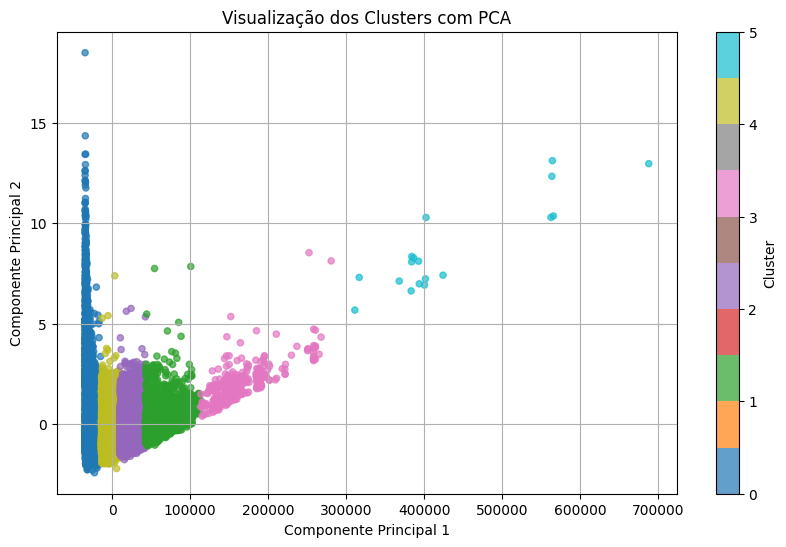

In [94]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduz para 2 dimensões para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns='cluster'))  # remove a coluna cluster para não enviesar

# Plot dos clusters em 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], cmap='tab10', s=20, alpha=0.7)
plt.title("Visualização dos Clusters com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


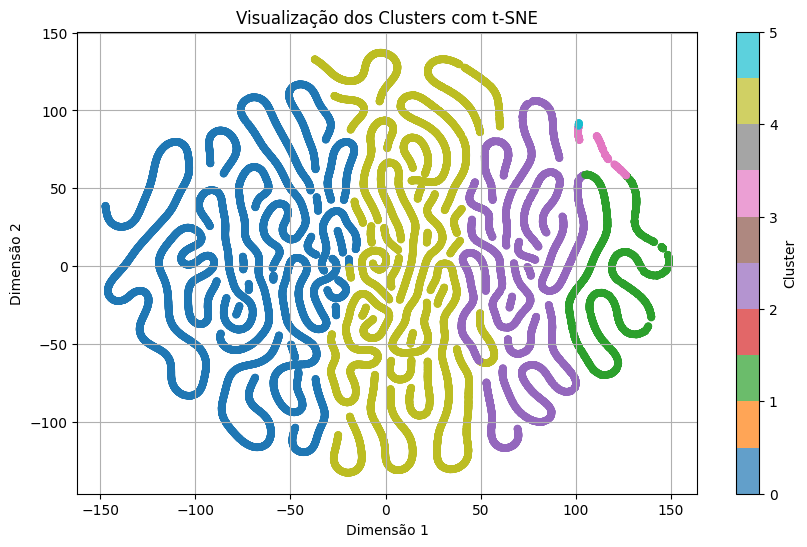

In [95]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X.drop(columns='cluster'))

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X['cluster'], cmap='tab10', s=20, alpha=0.7)
plt.title("Visualização dos Clusters com t-SNE")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()